In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [4]:
# Importing dataset
df = pd.read_csv("coffee data.csv")
print(df)

            date                 datetime cash_type                 card  \
0     2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   
1     2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   
2     2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   
3     2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   
4     2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   
...          ...                      ...       ...                  ...   
1744  2024-09-30  2024-09-30 19:53:14.092      card  ANON-0000-0000-0694   
1745  2024-09-30  2024-09-30 19:54:17.620      card  ANON-0000-0000-0631   
1746  2024-09-30  2024-09-30 19:59:18.993      card  ANON-0000-0000-0531   
1747  2024-09-30  2024-09-30 20:00:42.135      card  ANON-0000-0000-0633   
1748  2024-09-30  2024-09-30 20:01:42.191      card  ANON-0000-0000-0695   

      money          coffee_name  
0     38.70                Latte  
1     38.70      

In [5]:
df.head()  # returns the values from the top

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [6]:
# checking the data types of given columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1749 non-null   object 
 1   datetime     1749 non-null   object 
 2   cash_type    1749 non-null   object 
 3   card         1660 non-null   object 
 4   money        1749 non-null   float64
 5   coffee_name  1749 non-null   object 
dtypes: float64(1), object(5)
memory usage: 82.1+ KB


In [7]:
df['money'] = df['money'].astype('int')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         1749 non-null   object
 1   datetime     1749 non-null   object
 2   cash_type    1749 non-null   object
 3   card         1660 non-null   object
 4   money        1749 non-null   int64 
 5   coffee_name  1749 non-null   object
dtypes: int64(1), object(5)
memory usage: 82.1+ KB


In [8]:
df.describe()

,money
count,1749.000000
mean,30.849057
std,5.223174
min,18.000000
25%,27.000000
50%,32.000000
75%,37.000000
max,40.000000


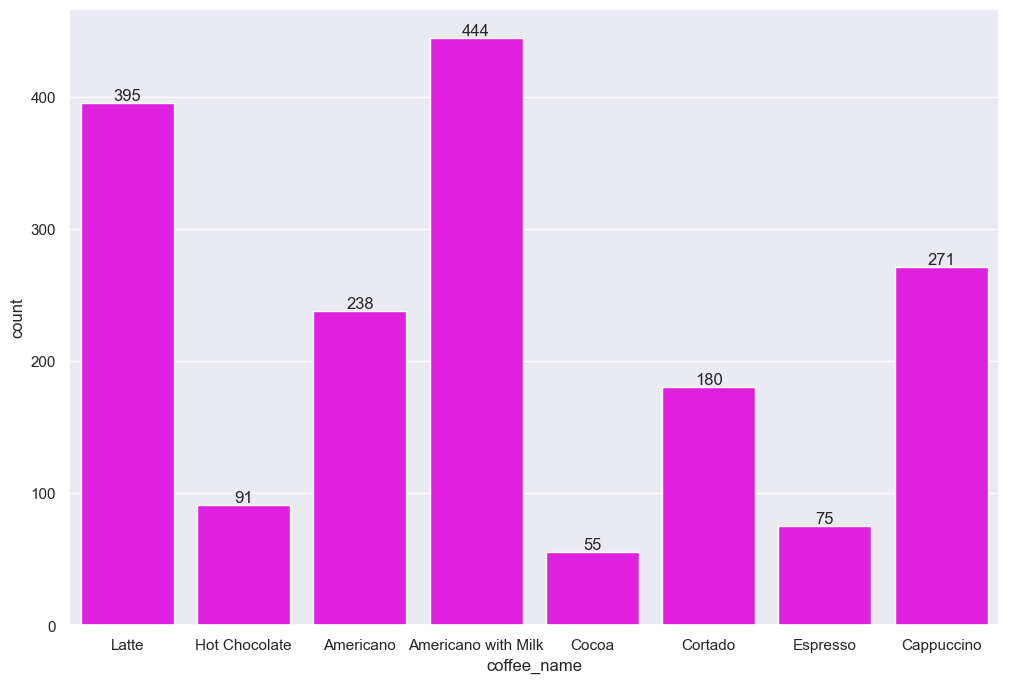

In [10]:
ax = sns.countplot(x='coffee_name' , data=df, color='magenta')
sns.set(rc={'figure.figsize':(12,8)})

for bars in ax.containers:
    ax.bar_label(bars)

In [12]:
top_purchase = df.groupby(['coffee_name'],as_index=False)['money'].sum().sort_values(by='money',ascending=False)
print(top_purchase)

           coffee_name  money
7                Latte  13707
1  Americano with Milk  13189
2           Cappuccino   9597
0            Americano   6133
4              Cortado   4592
6        Hot Chocolate   3264
3                Cocoa   1906
5             Espresso   1567


<Axes: xlabel='coffee_name', ylabel='money'>

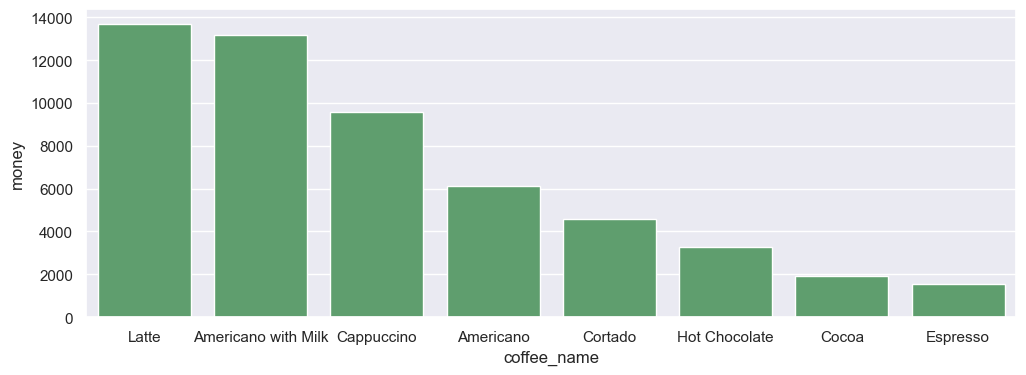

In [13]:
sns.set(rc={'figure.figsize':(12,4)})
sns.barplot(data = top_purchase , x='coffee_name' , y='money',color='g')

In [37]:
df.columns

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')

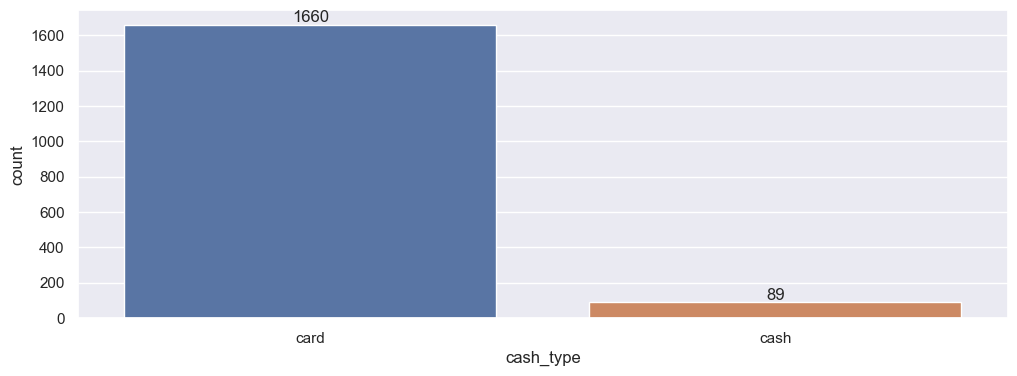

In [14]:
payment_mode = sns.countplot(data = df , x='cash_type',hue='cash_type')
sns.set(rc={'figure.figsize':(3,5)})
for bars in payment_mode.containers:
    payment_mode.bar_label(bars)

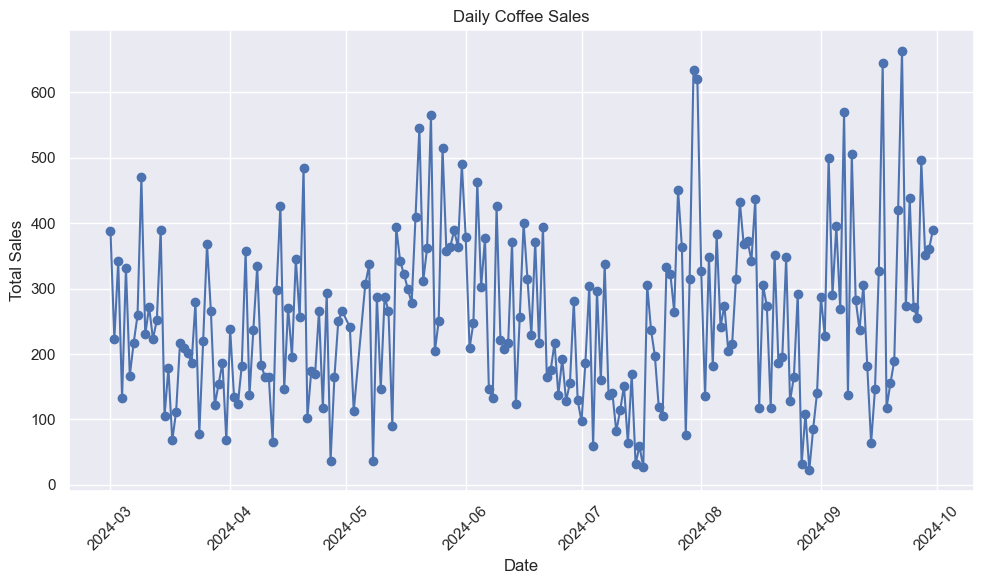

In [15]:
df['datetime'] = pd.to_datetime(df['datetime'])

daily_sales = df.groupby(df['datetime'].dt.date)['money'].sum()

plt.figure(figsize=(10, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-')
plt.title('Daily Coffee Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


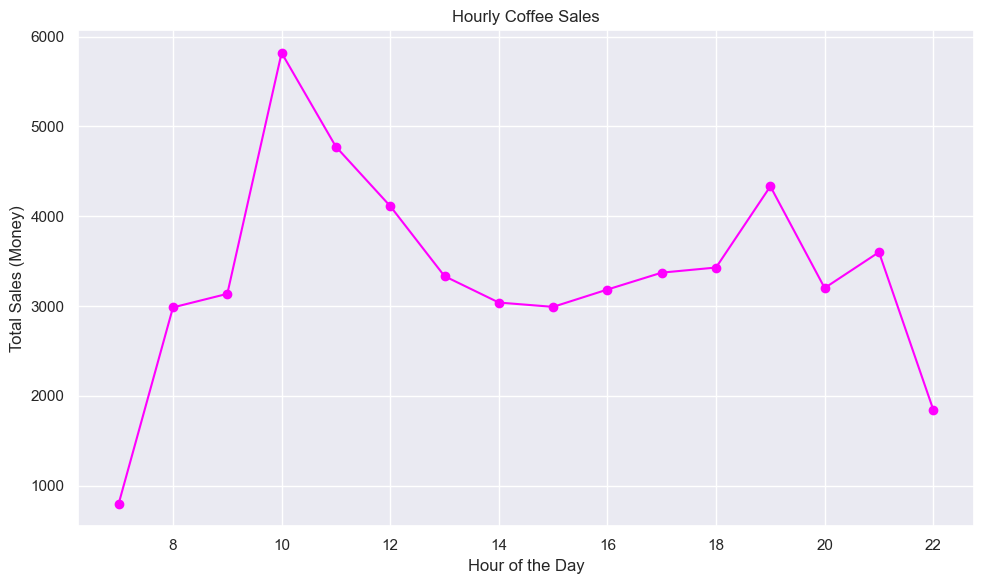

In [18]:

hourly_sales = df.groupby(df['datetime'].dt.hour)['money'].sum()

plt.figure(figsize=(10, 6))
hourly_sales.plot(kind='line', marker='o', linestyle='-',color='magenta')
plt.title('Hourly Coffee Sales')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales (Money)')
plt.grid(True)
plt.tight_layout()
plt.show()
